In [2]:
import pandas as pd
import statsmodels.formula.api as sfa
import statsmodels.api as sa
import matplotlib.pyplot as plt
import lmdiag

In [3]:
df = pd.read_csv('datasets/simple-linear-regression/infectionrisk.csv')
df.shape

(113, 2)

In [4]:
df.head()

Stay  InfctRsk
0   7.13       4.1
1   8.82       1.6
2   8.34       2.7
3   8.95       5.6
4  11.20       5.7

In [5]:
df.describe()

Stay    InfctRsk
count  113.000000  113.000000
mean     9.648319    4.354867
std      1.911456    1.340908
min      6.700000    1.300000
25%      8.340000    3.700000
50%      9.420000    4.400000
75%     10.470000    5.200000
max     19.560000    7.800000

In [6]:
q3 = df.quantile(q = 0.75)
q1 = df.quantile(q = 0.25)

In [7]:
q3

Stay        10.47
InfctRsk     5.20
Name: 0.75, dtype: float64

In [8]:
q1

Stay        8.34
InfctRsk    3.70
Name: 0.25, dtype: float64

In [9]:
iqr = q3 - q1

In [10]:
# Detecting the outliers
upperbound = q3 + iqr * 1.5
lowerbound = q1 - iqr * 1.5
print('Outliers')
print('-------------------------')
print('Lower Bound:\n', lowerbound)
print('-------------------------')
print('Upper Bound:\n', upperbound)


Outliers
-------------------------
Lower Bound:
 Stay        5.145
InfctRsk    1.450
dtype: float64
-------------------------
Upper Bound:
 Stay        13.665
InfctRsk     7.450
dtype: float64


#### Detecting outliers for lowerbound

In [39]:
(df < lowerbound ).sum()

Stay        0
InfctRsk    3
dtype: int64

In [36]:
# No outliers
df[df.Stay < lowerbound.Stay]

Empty DataFrame
Columns: [Stay, InfctRsk]
Index: []

In [38]:
# Outliers are there for InfctRsk as observed from the output.
df[df.InfctRsk < lowerbound.InfctRsk]

Stay  InfctRsk
39   8.16       1.3
92   8.92       1.3
106  7.14       1.4

#### Detecting outliers for upperbound

In [59]:
(df > upperbound ).sum()

Stay        3
InfctRsk    3
dtype: int64

In [58]:
df[df.Stay > upperbound.Stay]

Stay  InfctRsk
46   19.56       6.5
103  13.95       6.6
111  17.94       5.9

In [42]:
df[df.InfctRsk > upperbound.InfctRsk]

Stay  InfctRsk
12  12.78       7.7
52  11.41       7.6
53  12.07       7.8

#### Scatter plot for the data

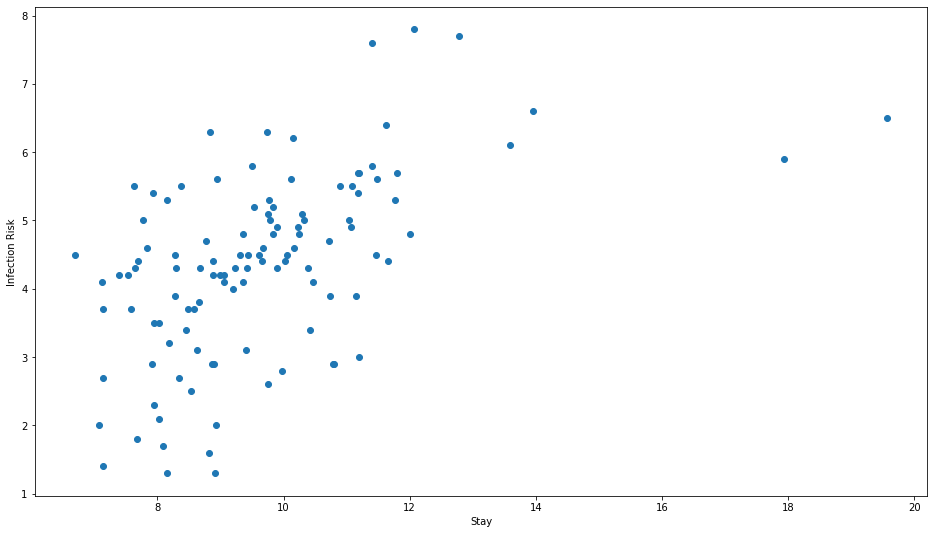

In [48]:
plt.figure(figsize = (16, 9))
plt.xlabel('Stay')
plt.ylabel('Infection Risk')
plt.scatter(df.Stay, df.InfctRsk)
plt.show()

In [49]:
# Correlation
print("Correclation")
print(df.corr())

Correclation
              Stay  InfctRsk
Stay      1.000000  0.533444
InfctRsk  0.533444  1.000000


In [50]:
# Covariance
print("Covariance")
print(df.cov())

Covariance
              Stay  InfctRsk
Stay      3.653664  1.367263
InfctRsk  1.367263  1.798034


In [52]:
model = sfa.ols(formula = 'InfctRsk~Stay', data = df).fit()

In [53]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               InfctRsk   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     44.15
Date:                Wed, 18 Dec 2019   Prob (F-statistic):           1.18e-09
Time:                        23:12:21   Log-Likelihood:                -174.07
No. Observations:                 113   AIC:                             352.1
Df Residuals:                     111   BIC:                             357.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7443      0.554      1.344      0.1

In [54]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               InfctRsk   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     44.15
Date:                Wed, 18 Dec 2019   Prob (F-statistic):           1.18e-09
Time:                        23:12:35   Log-Likelihood:                -174.07
No. Observations:                 113   AIC:                             352.1
Df Residuals:                     111   BIC:                             357.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7443      0.554      1.344      0.182      -0.353       1.842
Stay           0.3742      0.056      6.645      0.000       0.263       0.486
==============================================================================
Omnibus:                        1.189   Durbin-Watson:                   1.821
Prob(Omnibus):                  0.552   Jarque-Bera (JB):                1.228
Skew:                          -0.237   Prob(JB):                        0.541
Kurtosis:                       2.811   Cond. No.                         51.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared values is too low. Lets see the diagnostic plots.

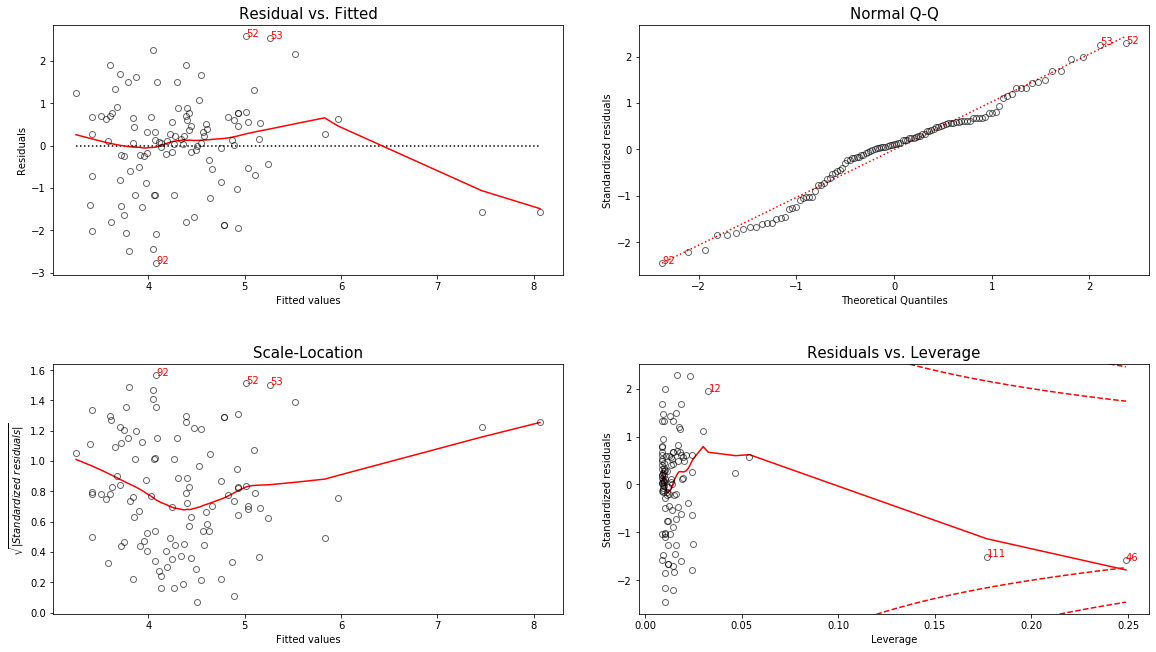

In [55]:
plt.figure(figsize = (16, 9))
lmdiag.plot(model)
plt.show()

It seems the problem with outliers. Lets remove the outliers and try again.

#### Removing Outliers

In [69]:
df_shape = df[( df.Stay < upperbound.Stay ) & (df.Stay > lowerbound.Stay) ]

In [73]:
df_final = df_shape[(df_shape.InfctRsk < upperbound.InfctRsk) & (df_shape.InfctRsk > lowerbound.InfctRsk)]

In [74]:
df_final

Stay  InfctRsk
0     7.13       4.1
1     8.82       1.6
2     8.34       2.7
3     8.95       5.6
4    11.20       5.7
..     ...       ...
107   8.02       2.1
108  11.80       5.7
109   9.50       5.8
110   7.70       4.4
112   9.41       3.1

[104 rows x 2 columns]

In [75]:
df_final.describe()

Stay    InfctRsk
count  104.000000  104.000000
mean     9.407019    4.288462
std      1.357626    1.114364
min      6.700000    1.600000
25%      8.330000    3.700000
50%      9.385000    4.400000
75%     10.307500    5.025000
max     13.590000    6.400000

In [77]:
# Find the outliers if any
final_q3 = df_final.quantile(q = 0.75)
final_q1 = df_final.quantile(q = 0.25)
final_iqr = q3 - q1

In [78]:
# lowerbound
lb_final = final_q1 - final_iqr * 1.5
ub_final = final_q3 + final_iqr * 1.5

print("Lower Bound")
print(lb_final)

print('--------------------------------------------')
print("Upper Bound")
print(ub_final)


Lower Bound
Stay        5.135
InfctRsk    1.450
dtype: float64
--------------------------------------------
Upper Bound
Stay        13.5025
InfctRsk     7.2750
dtype: float64


In [79]:
# Check for outliers
df_final.shape

(104, 2)

In [81]:
df_final[(df_final.Stay < lowerbound.Stay) & (df_final.Stay > upperbound.Stay)]

Empty DataFrame
Columns: [Stay, InfctRsk]
Index: []

In [82]:
df_final[(df_final.InfctRsk < lowerbound.InfctRsk) & (df_final.InfctRsk > upperbound.InfctRsk)]

Empty DataFrame
Columns: [Stay, InfctRsk]
Index: []

#### Scatter Plot

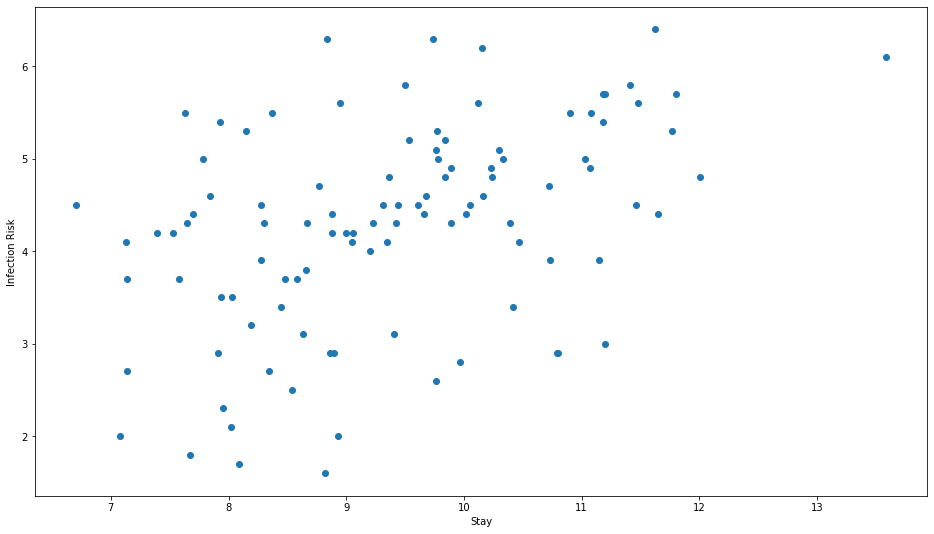

In [84]:
plt.figure(figsize = (16, 9))
plt.xlabel('Stay')
plt.ylabel('Infection Risk')
plt.scatter(df_final.Stay, df_final.InfctRsk)
plt.show()

In [86]:
model_final = sfa.ols(formula = 'InfctRsk~Stay', data=df_final).fit()

In [90]:
print(model_final.summary())

                            OLS Regression Results                            
Dep. Variable:               InfctRsk   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     24.89
Date:                Wed, 18 Dec 2019   Prob (F-statistic):           2.50e-06
Time:                        23:33:32   Log-Likelihood:                -146.97
No. Observations:                 104   AIC:                             297.9
Df Residuals:                     102   BIC:                             303.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8686      0.692      1.254      0.2

In [91]:
print(model.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.278   
Dependent Variable: InfctRsk         AIC:                352.1328
Date:               2019-12-18 23:33 BIC:                357.5876
No. Observations:   113              Log-Likelihood:     -174.07 
Df Model:           1                F-statistic:        44.15   
Df Residuals:       111              Prob (F-statistic): 1.18e-09
R-squared:          0.285            Scale:              1.2980  
-------------------------------------------------------------------
             Coef.    Std.Err.     t      P>|t|     [0.025   0.975]
-------------------------------------------------------------------
Intercept    0.7443     0.5539   1.3439   0.1817   -0.3532   1.8418
Stay         0.3742     0.0563   6.6445   0.0000    0.2626   0.4858
-----------------------------------------------------------------
Omnibus:               1.189        Durbin-Watson:          1.821
Prob(Omnibus):   

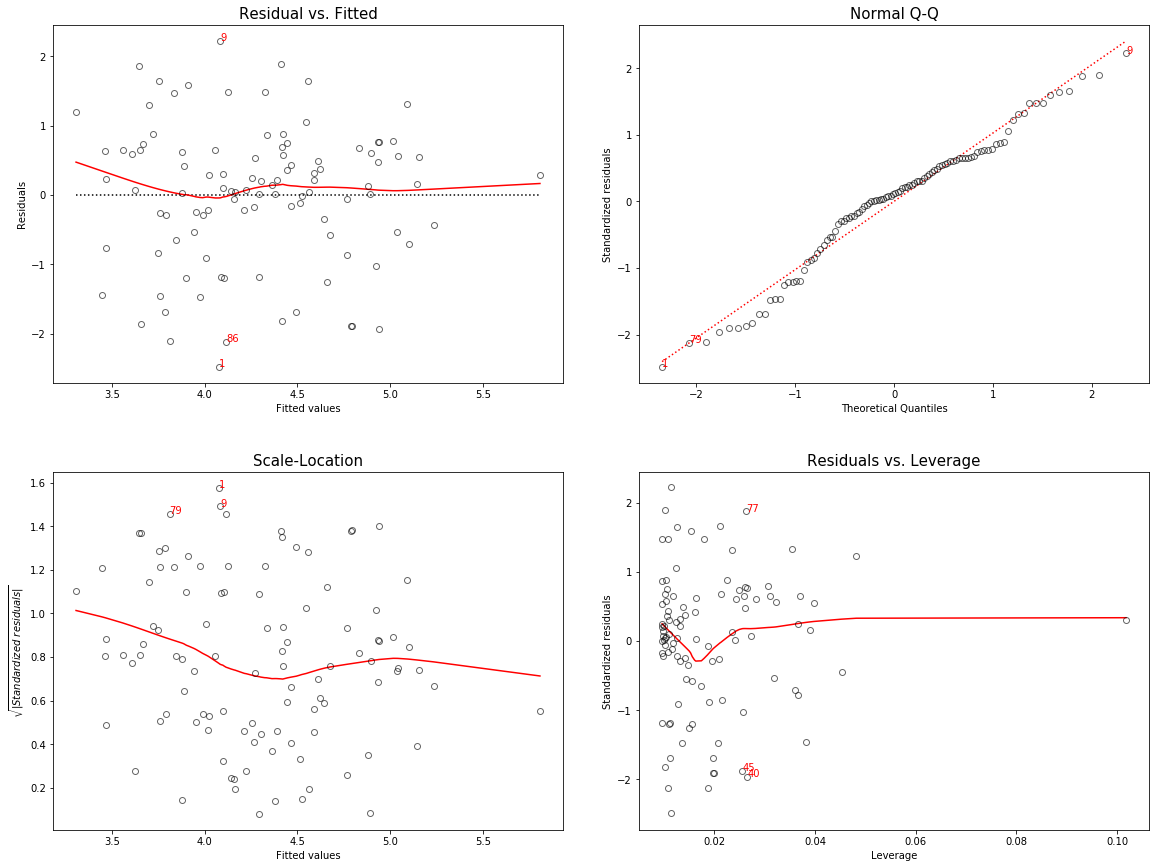

In [92]:
plt.figure(figsize = (16, 12))
lmdiag.plot(model_final)
plt.show()